# SQL Operations

In [6]:
import pandas as pd
from sqlalchemy import create_engine

# Create a SQLAlchemy engine to connect to your SQL database
# Replace 'your_connection_string' with the actual database connection string
engine = create_engine('mssql+pyodbc://MATSHA\SQLEXPRESS/Crimes In India?driver=SQL+Server&Trusted_Connection=yes')

# Write the SQL query to retrieve the required data
sql_query = """
SELECT 
    ipc.[STATE_UT] AS State_UT,
    ipc.YEAR,
    ipc.DISTRICT,
    ipc.MURDER
FROM 
    District_wise_crimes_committed_IPC_2001_2012 ipc
JOIN (
    SELECT 
        [STATE_UT],
        YEAR,
        MAX(MURDER) AS MaxMurder
    FROM 
        District_wise_crimes_committed_IPC_2001_2012
    GROUP BY 
        [STATE_UT], YEAR
) AS MaxMurders
ON 
    ipc.[STATE_UT] = MaxMurders.[STATE_UT]
    AND ipc.YEAR = MaxMurders.YEAR
    AND ipc.MURDER = MaxMurders.MaxMurder
"""

# Execute the SQL query
result = engine.execute(sql_query)

# Fetch the result into a DataFrame
df = pd.DataFrame(result.fetchall(), columns=result.keys())

# Analyze districts that appear 3 or more than 3 years
district_counts = df['DISTRICT'].value_counts()
districts_3_or_more_years = district_counts[district_counts >= 3].index.tolist()

# Filter the DataFrame to include only districts that appear 3 or more than 3 years
filtered_df = df[df['DISTRICT'].isin(districts_3_or_more_years)]

# Sort the filtered DataFrame by year in descending order
sorted_df = filtered_df.sort_values(by='YEAR', ascending=False)

# Print the sorted DataFrame
print(sorted_df)


           State_UT  YEAR DISTRICT  MURDER
475      PUDUCHERRY  2012    TOTAL      29
456          ODISHA  2012    TOTAL    1548
454         MIZORAM  2012    TOTAL      30
453       MEGHALAYA  2012    TOTAL     137
452         MANIPUR  2012    TOTAL      83
..              ...   ...      ...     ...
26      UTTARAKHAND  2001    TOTAL     316
25    UTTAR PRADESH  2001    TOTAL    7601
24          TRIPURA  2001    TOTAL     240
23       TAMIL NADU  2001    TOTAL    1662
0    ANDHRA PRADESH  2001    TOTAL    2602

[474 rows x 4 columns]


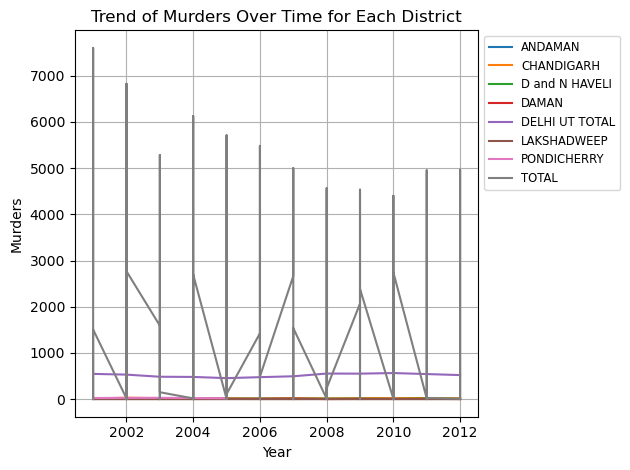

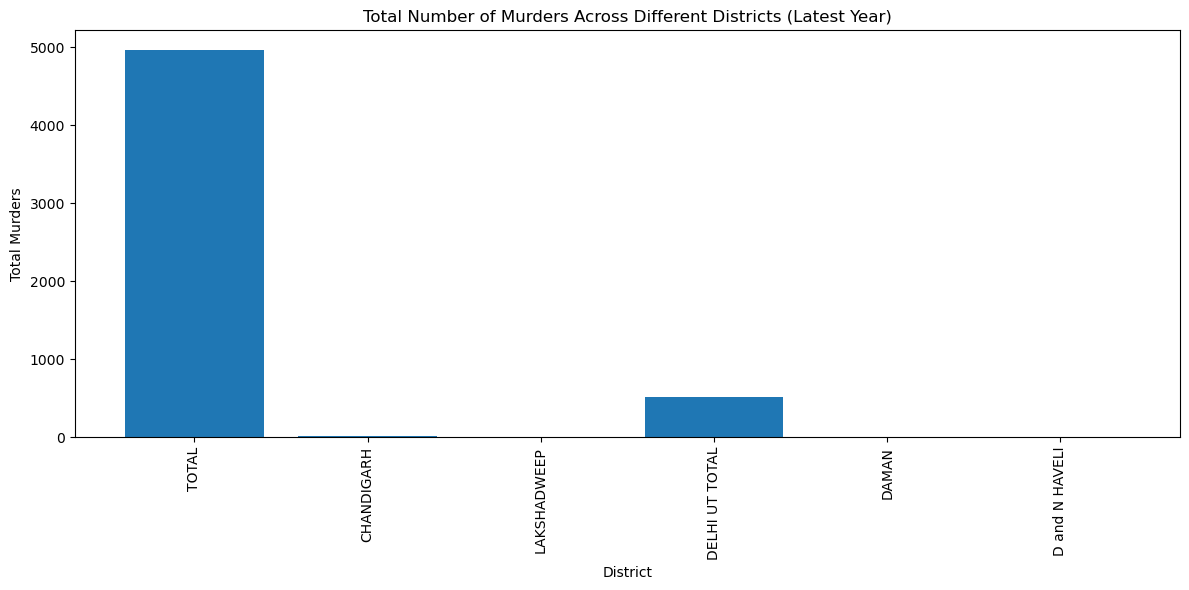

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

for district, data in sorted_df.groupby('DISTRICT'):
    plt.plot(data['YEAR'], data['MURDER'], label=district)
plt.title('Trend of Murders Over Time for Each District')
plt.xlabel('Year')
plt.ylabel('Murders')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot to compare total number of murders across different districts for a specific year (e.g., latest year)
latest_year_data = sorted_df[sorted_df['YEAR'] == sorted_df['YEAR'].max()]
plt.figure(figsize=(12, 6))
plt.bar(latest_year_data['DISTRICT'], latest_year_data['MURDER'])
plt.title('Total Number of Murders Across Different Districts (Latest Year)')
plt.xlabel('District')
plt.ylabel('Total Murders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
